In [1]:
import uproot  # For loading ROOT files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
from dataAnalyse import CCV2
from torch_geometric.data import DataLoader 

In [3]:
testpath = "/vols/cms/mm1221/Data/2pi/test/"  # Replace with your ROOT file path
data_test = CCV2(testpath, max_events=12000, inp = 'test')

test_loader = DataLoader(data_test, batch_size=1, shuffle=False, follow_batch=['x'])

### Loading tracksters data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.85s/it]
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [4]:
#0.0005,32,128,3,0.2,12,128
# Initialize model and load state dictionary
from model import Net
model = Net(hidden_dim = 128, num_layers = 3, dropout = 0.2, contrastive_dim = 128)
checkpoint= torch.load('/vols/cms/mm1221/hgcal/TrackPi/StaticEdge/results/init/results_lr0.0005_bs32_hd128_nl3_do0.2_k12_cd128/best_model.pt',  map_location=torch.device('cpu'))
model.load_state_dict(checkpoint)  # Directly use the loaded checkpoint
model.eval()  # Set model to evaluation mode

Net(
  (lc_encode): Sequential(
    (0): Linear(in_features=15, out_features=128, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ELU(alpha=1.0)
  )
  (convs): ModuleList(
    (0-2): 3 x CustomStaticEdgeConv(
      (nn_module): Sequential(
        (0): Linear(in_features=256, out_features=128, bias=True)
        (1): ELU(alpha=1.0)
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (output): Sequential(
    (0): Linear(in_features=128, out_features=32, bias=True)
    (1): ELU(alpha=1.0)
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=32, out_features=16, bias=True)
    (4): ELU(alpha=1.0)
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=16, out_features=128, bias=True)
  )
)

In [5]:
from torch_geometric.nn import knn_graph

all_predictions = []  # List to store predictions for all events

# Loop through all events in the test dataset
for i, data in enumerate(data_test):
    print(f"Processing event {i+1}/{len(data_test)}...")

    # Compute k-nearest neighbor graph for the event
    edge_index = knn_graph(data.x, k=12)  # Adjust 'k' as needed
    
    # Generate predictions for the event
    predictions = model(data.x, edge_index, 1)
    
    # Store predictions
    all_predictions.append(predictions[0].detach().cpu().numpy())  # Convert to numpy if needed

# Convert list of predictions to a single numpy array
all_predictions = np.array(all_predictions)

# Print result
print("Predictions for all events shape:", all_predictions.shape)


Processing event 1/3530...
Processing event 2/3530...
Processing event 3/3530...
Processing event 4/3530...
Processing event 5/3530...
Processing event 6/3530...
Processing event 7/3530...
Processing event 8/3530...
Processing event 9/3530...
Processing event 10/3530...
Processing event 11/3530...
Processing event 12/3530...
Processing event 13/3530...
Processing event 14/3530...
Processing event 15/3530...
Processing event 16/3530...
Processing event 17/3530...
Processing event 18/3530...
Processing event 19/3530...
Processing event 20/3530...
Processing event 21/3530...
Processing event 22/3530...
Processing event 23/3530...
Processing event 24/3530...
Processing event 25/3530...
Processing event 26/3530...
Processing event 27/3530...
Processing event 28/3530...
Processing event 29/3530...
Processing event 30/3530...
Processing event 31/3530...
Processing event 32/3530...
Processing event 33/3530...
Processing event 34/3530...
Processing event 35/3530...
Processing event 36/3530...
P

Processing event 304/3530...
Processing event 305/3530...
Processing event 306/3530...
Processing event 307/3530...
Processing event 308/3530...
Processing event 309/3530...
Processing event 310/3530...
Processing event 311/3530...
Processing event 312/3530...
Processing event 313/3530...
Processing event 314/3530...
Processing event 315/3530...
Processing event 316/3530...
Processing event 317/3530...
Processing event 318/3530...
Processing event 319/3530...
Processing event 320/3530...
Processing event 321/3530...
Processing event 322/3530...
Processing event 323/3530...
Processing event 324/3530...
Processing event 325/3530...
Processing event 326/3530...
Processing event 327/3530...
Processing event 328/3530...
Processing event 329/3530...
Processing event 330/3530...
Processing event 331/3530...
Processing event 332/3530...
Processing event 333/3530...
Processing event 334/3530...
Processing event 335/3530...
Processing event 336/3530...
Processing event 337/3530...
Processing eve

Processing event 589/3530...
Processing event 590/3530...
Processing event 591/3530...
Processing event 592/3530...
Processing event 593/3530...
Processing event 594/3530...
Processing event 595/3530...
Processing event 596/3530...
Processing event 597/3530...
Processing event 598/3530...
Processing event 599/3530...
Processing event 600/3530...
Processing event 601/3530...
Processing event 602/3530...
Processing event 603/3530...
Processing event 604/3530...
Processing event 605/3530...
Processing event 606/3530...
Processing event 607/3530...
Processing event 608/3530...
Processing event 609/3530...
Processing event 610/3530...
Processing event 611/3530...
Processing event 612/3530...
Processing event 613/3530...
Processing event 614/3530...
Processing event 615/3530...
Processing event 616/3530...
Processing event 617/3530...
Processing event 618/3530...
Processing event 619/3530...
Processing event 620/3530...
Processing event 621/3530...
Processing event 622/3530...
Processing eve

Processing event 888/3530...
Processing event 889/3530...
Processing event 890/3530...
Processing event 891/3530...
Processing event 892/3530...
Processing event 893/3530...
Processing event 894/3530...
Processing event 895/3530...
Processing event 896/3530...
Processing event 897/3530...
Processing event 898/3530...
Processing event 899/3530...
Processing event 900/3530...
Processing event 901/3530...
Processing event 902/3530...
Processing event 903/3530...
Processing event 904/3530...
Processing event 905/3530...
Processing event 906/3530...
Processing event 907/3530...
Processing event 908/3530...
Processing event 909/3530...
Processing event 910/3530...
Processing event 911/3530...
Processing event 912/3530...
Processing event 913/3530...
Processing event 914/3530...
Processing event 915/3530...
Processing event 916/3530...
Processing event 917/3530...
Processing event 918/3530...
Processing event 919/3530...
Processing event 920/3530...
Processing event 921/3530...
Processing eve

Processing event 1177/3530...
Processing event 1178/3530...
Processing event 1179/3530...
Processing event 1180/3530...
Processing event 1181/3530...
Processing event 1182/3530...
Processing event 1183/3530...
Processing event 1184/3530...
Processing event 1185/3530...
Processing event 1186/3530...
Processing event 1187/3530...
Processing event 1188/3530...
Processing event 1189/3530...
Processing event 1190/3530...
Processing event 1191/3530...
Processing event 1192/3530...
Processing event 1193/3530...
Processing event 1194/3530...
Processing event 1195/3530...
Processing event 1196/3530...
Processing event 1197/3530...
Processing event 1198/3530...
Processing event 1199/3530...
Processing event 1200/3530...
Processing event 1201/3530...
Processing event 1202/3530...
Processing event 1203/3530...
Processing event 1204/3530...
Processing event 1205/3530...
Processing event 1206/3530...
Processing event 1207/3530...
Processing event 1208/3530...
Processing event 1209/3530...
Processing

Processing event 1462/3530...
Processing event 1463/3530...
Processing event 1464/3530...
Processing event 1465/3530...
Processing event 1466/3530...
Processing event 1467/3530...
Processing event 1468/3530...
Processing event 1469/3530...
Processing event 1470/3530...
Processing event 1471/3530...
Processing event 1472/3530...
Processing event 1473/3530...
Processing event 1474/3530...
Processing event 1475/3530...
Processing event 1476/3530...
Processing event 1477/3530...
Processing event 1478/3530...
Processing event 1479/3530...
Processing event 1480/3530...
Processing event 1481/3530...
Processing event 1482/3530...
Processing event 1483/3530...
Processing event 1484/3530...
Processing event 1485/3530...
Processing event 1486/3530...
Processing event 1487/3530...
Processing event 1488/3530...
Processing event 1489/3530...
Processing event 1490/3530...
Processing event 1491/3530...
Processing event 1492/3530...
Processing event 1493/3530...
Processing event 1494/3530...
Processing

Processing event 1741/3530...
Processing event 1742/3530...
Processing event 1743/3530...
Processing event 1744/3530...
Processing event 1745/3530...
Processing event 1746/3530...
Processing event 1747/3530...
Processing event 1748/3530...
Processing event 1749/3530...
Processing event 1750/3530...
Processing event 1751/3530...
Processing event 1752/3530...
Processing event 1753/3530...
Processing event 1754/3530...
Processing event 1755/3530...
Processing event 1756/3530...
Processing event 1757/3530...
Processing event 1758/3530...
Processing event 1759/3530...
Processing event 1760/3530...
Processing event 1761/3530...
Processing event 1762/3530...
Processing event 1763/3530...
Processing event 1764/3530...
Processing event 1765/3530...
Processing event 1766/3530...
Processing event 1767/3530...
Processing event 1768/3530...
Processing event 1769/3530...
Processing event 1770/3530...
Processing event 1771/3530...
Processing event 1772/3530...
Processing event 1773/3530...
Processing

Processing event 2018/3530...
Processing event 2019/3530...
Processing event 2020/3530...
Processing event 2021/3530...
Processing event 2022/3530...
Processing event 2023/3530...
Processing event 2024/3530...
Processing event 2025/3530...
Processing event 2026/3530...
Processing event 2027/3530...
Processing event 2028/3530...
Processing event 2029/3530...
Processing event 2030/3530...
Processing event 2031/3530...
Processing event 2032/3530...
Processing event 2033/3530...
Processing event 2034/3530...
Processing event 2035/3530...
Processing event 2036/3530...
Processing event 2037/3530...
Processing event 2038/3530...
Processing event 2039/3530...
Processing event 2040/3530...
Processing event 2041/3530...
Processing event 2042/3530...
Processing event 2043/3530...
Processing event 2044/3530...
Processing event 2045/3530...
Processing event 2046/3530...
Processing event 2047/3530...
Processing event 2048/3530...
Processing event 2049/3530...
Processing event 2050/3530...
Processing

Processing event 2297/3530...
Processing event 2298/3530...
Processing event 2299/3530...
Processing event 2300/3530...
Processing event 2301/3530...
Processing event 2302/3530...
Processing event 2303/3530...
Processing event 2304/3530...
Processing event 2305/3530...
Processing event 2306/3530...
Processing event 2307/3530...
Processing event 2308/3530...
Processing event 2309/3530...
Processing event 2310/3530...
Processing event 2311/3530...
Processing event 2312/3530...
Processing event 2313/3530...
Processing event 2314/3530...
Processing event 2315/3530...
Processing event 2316/3530...
Processing event 2317/3530...
Processing event 2318/3530...
Processing event 2319/3530...
Processing event 2320/3530...
Processing event 2321/3530...
Processing event 2322/3530...
Processing event 2323/3530...
Processing event 2324/3530...
Processing event 2325/3530...
Processing event 2326/3530...
Processing event 2327/3530...
Processing event 2328/3530...
Processing event 2329/3530...
Processing

Processing event 2573/3530...
Processing event 2574/3530...
Processing event 2575/3530...
Processing event 2576/3530...
Processing event 2577/3530...
Processing event 2578/3530...
Processing event 2579/3530...
Processing event 2580/3530...
Processing event 2581/3530...
Processing event 2582/3530...
Processing event 2583/3530...
Processing event 2584/3530...
Processing event 2585/3530...
Processing event 2586/3530...
Processing event 2587/3530...
Processing event 2588/3530...
Processing event 2589/3530...
Processing event 2590/3530...
Processing event 2591/3530...
Processing event 2592/3530...
Processing event 2593/3530...
Processing event 2594/3530...
Processing event 2595/3530...
Processing event 2596/3530...
Processing event 2597/3530...
Processing event 2598/3530...
Processing event 2599/3530...
Processing event 2600/3530...
Processing event 2601/3530...
Processing event 2602/3530...
Processing event 2603/3530...
Processing event 2604/3530...
Processing event 2605/3530...
Processing

Processing event 2849/3530...
Processing event 2850/3530...
Processing event 2851/3530...
Processing event 2852/3530...
Processing event 2853/3530...
Processing event 2854/3530...
Processing event 2855/3530...
Processing event 2856/3530...
Processing event 2857/3530...
Processing event 2858/3530...
Processing event 2859/3530...
Processing event 2860/3530...
Processing event 2861/3530...
Processing event 2862/3530...
Processing event 2863/3530...
Processing event 2864/3530...
Processing event 2865/3530...
Processing event 2866/3530...
Processing event 2867/3530...
Processing event 2868/3530...
Processing event 2869/3530...
Processing event 2870/3530...
Processing event 2871/3530...
Processing event 2872/3530...
Processing event 2873/3530...
Processing event 2874/3530...
Processing event 2875/3530...
Processing event 2876/3530...
Processing event 2877/3530...
Processing event 2878/3530...
Processing event 2879/3530...
Processing event 2880/3530...
Processing event 2881/3530...
Processing

Processing event 3128/3530...
Processing event 3129/3530...
Processing event 3130/3530...
Processing event 3131/3530...
Processing event 3132/3530...
Processing event 3133/3530...
Processing event 3134/3530...
Processing event 3135/3530...
Processing event 3136/3530...
Processing event 3137/3530...
Processing event 3138/3530...
Processing event 3139/3530...
Processing event 3140/3530...
Processing event 3141/3530...
Processing event 3142/3530...
Processing event 3143/3530...
Processing event 3144/3530...
Processing event 3145/3530...
Processing event 3146/3530...
Processing event 3147/3530...
Processing event 3148/3530...
Processing event 3149/3530...
Processing event 3150/3530...
Processing event 3151/3530...
Processing event 3152/3530...
Processing event 3153/3530...
Processing event 3154/3530...
Processing event 3155/3530...
Processing event 3156/3530...
Processing event 3157/3530...
Processing event 3158/3530...
Processing event 3159/3530...
Processing event 3160/3530...
Processing

Processing event 3420/3530...
Processing event 3421/3530...
Processing event 3422/3530...
Processing event 3423/3530...
Processing event 3424/3530...
Processing event 3425/3530...
Processing event 3426/3530...
Processing event 3427/3530...
Processing event 3428/3530...
Processing event 3429/3530...
Processing event 3430/3530...
Processing event 3431/3530...
Processing event 3432/3530...
Processing event 3433/3530...
Processing event 3434/3530...
Processing event 3435/3530...
Processing event 3436/3530...
Processing event 3437/3530...
Processing event 3438/3530...
Processing event 3439/3530...
Processing event 3440/3530...
Processing event 3441/3530...
Processing event 3442/3530...
Processing event 3443/3530...
Processing event 3444/3530...
Processing event 3445/3530...
Processing event 3446/3530...
Processing event 3447/3530...
Processing event 3448/3530...
Processing event 3449/3530...
Processing event 3450/3530...
Processing event 3451/3530...
Processing event 3452/3530...
Processing

/tmp/ipykernel_2512189/3237170132.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_predictions = np.array(all_predictions)


In [6]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import time

# Initialize lists to store cluster labels and clustering times
all_cluster_labels = []       # List to store cluster labels for all events
all_clustering_times = []     # List to store time taken for clustering each event

# Parameters for Agglomerative Clustering
distance_threshold = 0.65    # Adjust this value based on your data
linkage = 'average'           # Linkage criteria: 'ward', 'complete', 'average', 'single'
metric = 'cosine'             # Distance metric: 'cosine', 'euclidean', etc.
compute_distances = True      # Whether to compute distances between clusters

# Total number of events (for progress tracking)
total_events = len(all_predictions)

# Loop through all events in all_predictions
for i, pred in enumerate(all_predictions):
    print(f"Processing event {i+1}/{total_events}...")
    
    # Check if there are less than 2 samples (nodes)
    if len(pred) < 2:
        cluster_labels = np.ones(len(pred), dtype=int)  # Assign all nodes to cluster 1
    else:
        # Initialize AgglomerativeClustering with specified parameters
        agglomerative = AgglomerativeClustering(
            n_clusters=None,                  # Let the algorithm determine the number of clusters
            distance_threshold=distance_threshold,
            linkage=linkage,
            metric=metric,
            compute_distances=compute_distances
        )
        
        # Record the start time
        start_time = time.time()
        
        # Perform clustering
        cluster_labels = agglomerative.fit_predict(pred)  # pred = predictions for this event
        
        # Record the end time
        end_time = time.time()
        
        # Calculate the time taken for clustering
        clustering_time = end_time - start_time
        all_clustering_times.append(clustering_time)
    
    # Append the cluster labels to the list
    all_cluster_labels.append(cluster_labels)

# Convert the list of cluster labels and times to NumPy arrays
all_cluster_labels = np.array(all_cluster_labels)
all_clustering_times = np.array(all_clustering_times)

# Print results
print("\nClustering Results:")
print("Shape of all_cluster_labels:", all_cluster_labels.shape)
print("Cluster labels for first event:", all_cluster_labels[0])

# Print timing information
total_time = all_clustering_times.sum()
average_time = all_clustering_times.mean()
print(f"\nTotal clustering time: {total_time:.2f} seconds")
print(f"Average clustering time per event: {average_time:.4f} seconds")

Processing event 1/3530...
Processing event 2/3530...
Processing event 3/3530...
Processing event 4/3530...
Processing event 5/3530...
Processing event 6/3530...
Processing event 7/3530...
Processing event 8/3530...
Processing event 9/3530...
Processing event 10/3530...
Processing event 11/3530...
Processing event 12/3530...
Processing event 13/3530...
Processing event 14/3530...
Processing event 15/3530...
Processing event 16/3530...
Processing event 17/3530...
Processing event 18/3530...
Processing event 19/3530...
Processing event 20/3530...
Processing event 21/3530...
Processing event 22/3530...
Processing event 23/3530...
Processing event 24/3530...
Processing event 25/3530...
Processing event 26/3530...
Processing event 27/3530...
Processing event 28/3530...
Processing event 29/3530...
Processing event 30/3530...
Processing event 31/3530...
Processing event 32/3530...
Processing event 33/3530...
Processing event 34/3530...
Processing event 35/3530...
Processing event 36/3530...
P

Processing event 378/3530...
Processing event 379/3530...
Processing event 380/3530...
Processing event 381/3530...
Processing event 382/3530...
Processing event 383/3530...
Processing event 384/3530...
Processing event 385/3530...
Processing event 386/3530...
Processing event 387/3530...
Processing event 388/3530...
Processing event 389/3530...
Processing event 390/3530...
Processing event 391/3530...
Processing event 392/3530...
Processing event 393/3530...
Processing event 394/3530...
Processing event 395/3530...
Processing event 396/3530...
Processing event 397/3530...
Processing event 398/3530...
Processing event 399/3530...
Processing event 400/3530...
Processing event 401/3530...
Processing event 402/3530...
Processing event 403/3530...
Processing event 404/3530...
Processing event 405/3530...
Processing event 406/3530...
Processing event 407/3530...
Processing event 408/3530...
Processing event 409/3530...
Processing event 410/3530...
Processing event 411/3530...
Processing eve

Processing event 744/3530...
Processing event 745/3530...
Processing event 746/3530...
Processing event 747/3530...
Processing event 748/3530...
Processing event 749/3530...
Processing event 750/3530...
Processing event 751/3530...
Processing event 752/3530...
Processing event 753/3530...
Processing event 754/3530...
Processing event 755/3530...
Processing event 756/3530...
Processing event 757/3530...
Processing event 758/3530...
Processing event 759/3530...
Processing event 760/3530...
Processing event 761/3530...
Processing event 762/3530...
Processing event 763/3530...
Processing event 764/3530...
Processing event 765/3530...
Processing event 766/3530...
Processing event 767/3530...
Processing event 768/3530...
Processing event 769/3530...
Processing event 770/3530...
Processing event 771/3530...
Processing event 772/3530...
Processing event 773/3530...
Processing event 774/3530...
Processing event 775/3530...
Processing event 776/3530...
Processing event 777/3530...
Processing eve

Processing event 1107/3530...
Processing event 1108/3530...
Processing event 1109/3530...
Processing event 1110/3530...
Processing event 1111/3530...
Processing event 1112/3530...
Processing event 1113/3530...
Processing event 1114/3530...
Processing event 1115/3530...
Processing event 1116/3530...
Processing event 1117/3530...
Processing event 1118/3530...
Processing event 1119/3530...
Processing event 1120/3530...
Processing event 1121/3530...
Processing event 1122/3530...
Processing event 1123/3530...
Processing event 1124/3530...
Processing event 1125/3530...
Processing event 1126/3530...
Processing event 1127/3530...
Processing event 1128/3530...
Processing event 1129/3530...
Processing event 1130/3530...
Processing event 1131/3530...
Processing event 1132/3530...
Processing event 1133/3530...
Processing event 1134/3530...
Processing event 1135/3530...
Processing event 1136/3530...
Processing event 1137/3530...
Processing event 1138/3530...
Processing event 1139/3530...
Processing

Processing event 1479/3530...
Processing event 1480/3530...
Processing event 1481/3530...
Processing event 1482/3530...
Processing event 1483/3530...
Processing event 1484/3530...
Processing event 1485/3530...
Processing event 1486/3530...
Processing event 1487/3530...
Processing event 1488/3530...
Processing event 1489/3530...
Processing event 1490/3530...
Processing event 1491/3530...
Processing event 1492/3530...
Processing event 1493/3530...
Processing event 1494/3530...
Processing event 1495/3530...
Processing event 1496/3530...
Processing event 1497/3530...
Processing event 1498/3530...
Processing event 1499/3530...
Processing event 1500/3530...
Processing event 1501/3530...
Processing event 1502/3530...
Processing event 1503/3530...
Processing event 1504/3530...
Processing event 1505/3530...
Processing event 1506/3530...
Processing event 1507/3530...
Processing event 1508/3530...
Processing event 1509/3530...
Processing event 1510/3530...
Processing event 1511/3530...
Processing

Processing event 1825/3530...
Processing event 1826/3530...
Processing event 1827/3530...
Processing event 1828/3530...
Processing event 1829/3530...
Processing event 1830/3530...
Processing event 1831/3530...
Processing event 1832/3530...
Processing event 1833/3530...
Processing event 1834/3530...
Processing event 1835/3530...
Processing event 1836/3530...
Processing event 1837/3530...
Processing event 1838/3530...
Processing event 1839/3530...
Processing event 1840/3530...
Processing event 1841/3530...
Processing event 1842/3530...
Processing event 1843/3530...
Processing event 1844/3530...
Processing event 1845/3530...
Processing event 1846/3530...
Processing event 1847/3530...
Processing event 1848/3530...
Processing event 1849/3530...
Processing event 1850/3530...
Processing event 1851/3530...
Processing event 1852/3530...
Processing event 1853/3530...
Processing event 1854/3530...
Processing event 1855/3530...
Processing event 1856/3530...
Processing event 1857/3530...
Processing

Processing event 2176/3530...
Processing event 2177/3530...
Processing event 2178/3530...
Processing event 2179/3530...
Processing event 2180/3530...
Processing event 2181/3530...
Processing event 2182/3530...
Processing event 2183/3530...
Processing event 2184/3530...
Processing event 2185/3530...
Processing event 2186/3530...
Processing event 2187/3530...
Processing event 2188/3530...
Processing event 2189/3530...
Processing event 2190/3530...
Processing event 2191/3530...
Processing event 2192/3530...
Processing event 2193/3530...
Processing event 2194/3530...
Processing event 2195/3530...
Processing event 2196/3530...
Processing event 2197/3530...
Processing event 2198/3530...
Processing event 2199/3530...
Processing event 2200/3530...
Processing event 2201/3530...
Processing event 2202/3530...
Processing event 2203/3530...
Processing event 2204/3530...
Processing event 2205/3530...
Processing event 2206/3530...
Processing event 2207/3530...
Processing event 2208/3530...
Processing

Processing event 2520/3530...
Processing event 2521/3530...
Processing event 2522/3530...
Processing event 2523/3530...
Processing event 2524/3530...
Processing event 2525/3530...
Processing event 2526/3530...
Processing event 2527/3530...
Processing event 2528/3530...
Processing event 2529/3530...
Processing event 2530/3530...
Processing event 2531/3530...
Processing event 2532/3530...
Processing event 2533/3530...
Processing event 2534/3530...
Processing event 2535/3530...
Processing event 2536/3530...
Processing event 2537/3530...
Processing event 2538/3530...
Processing event 2539/3530...
Processing event 2540/3530...
Processing event 2541/3530...
Processing event 2542/3530...
Processing event 2543/3530...
Processing event 2544/3530...
Processing event 2545/3530...
Processing event 2546/3530...
Processing event 2547/3530...
Processing event 2548/3530...
Processing event 2549/3530...
Processing event 2550/3530...
Processing event 2551/3530...
Processing event 2552/3530...
Processing

Processing event 2862/3530...
Processing event 2863/3530...
Processing event 2864/3530...
Processing event 2865/3530...
Processing event 2866/3530...
Processing event 2867/3530...
Processing event 2868/3530...
Processing event 2869/3530...
Processing event 2870/3530...
Processing event 2871/3530...
Processing event 2872/3530...
Processing event 2873/3530...
Processing event 2874/3530...
Processing event 2875/3530...
Processing event 2876/3530...
Processing event 2877/3530...
Processing event 2878/3530...
Processing event 2879/3530...
Processing event 2880/3530...
Processing event 2881/3530...
Processing event 2882/3530...
Processing event 2883/3530...
Processing event 2884/3530...
Processing event 2885/3530...
Processing event 2886/3530...
Processing event 2887/3530...
Processing event 2888/3530...
Processing event 2889/3530...
Processing event 2890/3530...
Processing event 2891/3530...
Processing event 2892/3530...
Processing event 2893/3530...
Processing event 2894/3530...
Processing

Processing event 3215/3530...
Processing event 3216/3530...
Processing event 3217/3530...
Processing event 3218/3530...
Processing event 3219/3530...
Processing event 3220/3530...
Processing event 3221/3530...
Processing event 3222/3530...
Processing event 3223/3530...
Processing event 3224/3530...
Processing event 3225/3530...
Processing event 3226/3530...
Processing event 3227/3530...
Processing event 3228/3530...
Processing event 3229/3530...
Processing event 3230/3530...
Processing event 3231/3530...
Processing event 3232/3530...
Processing event 3233/3530...
Processing event 3234/3530...
Processing event 3235/3530...
Processing event 3236/3530...
Processing event 3237/3530...
Processing event 3238/3530...
Processing event 3239/3530...
Processing event 3240/3530...
Processing event 3241/3530...
Processing event 3242/3530...
Processing event 3243/3530...
Processing event 3244/3530...
Processing event 3245/3530...
Processing event 3246/3530...
Processing event 3247/3530...
Processing

/tmp/ipykernel_2512189/1731570689.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_cluster_labels = np.array(all_cluster_labels)


Processing Event 1/3530...


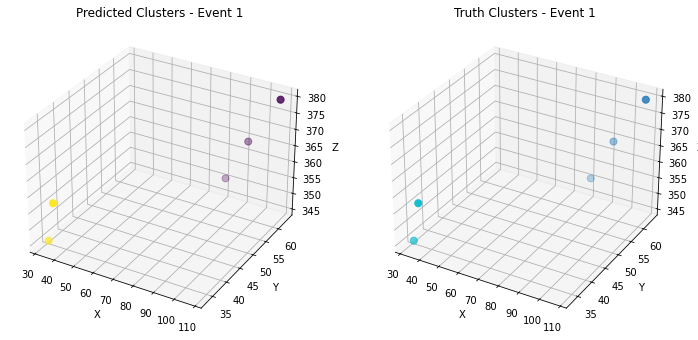

Processing Event 2/3530...


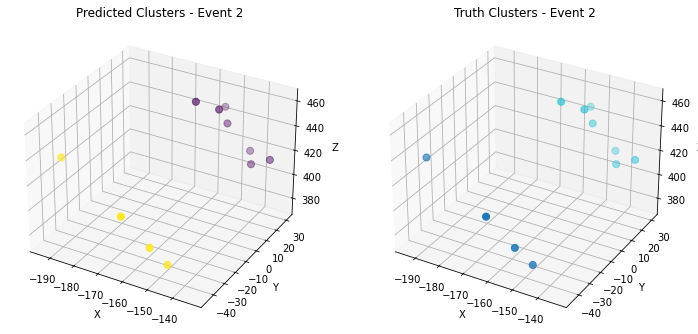

Processing Event 3/3530...


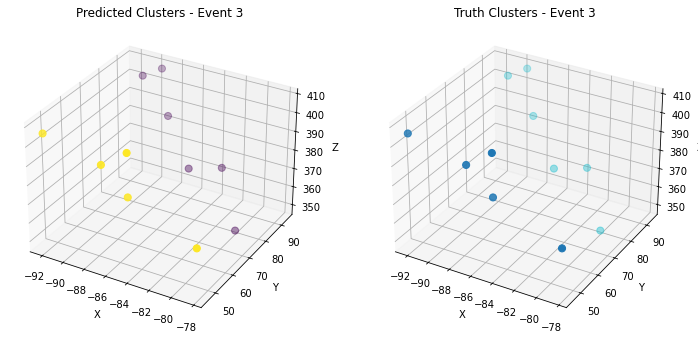

Processing Event 4/3530...


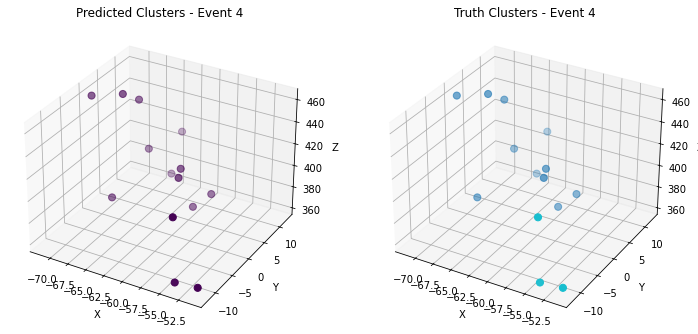

Processing Event 5/3530...


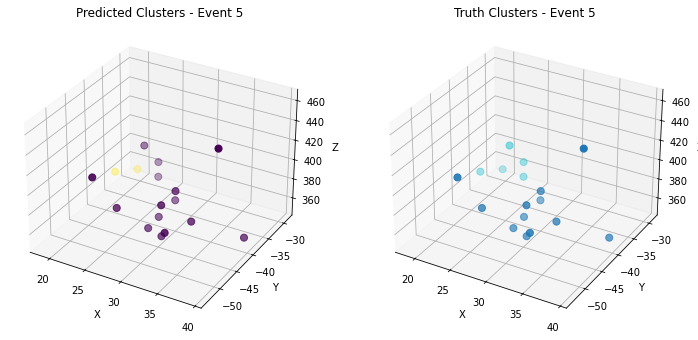

Processing Event 6/3530...


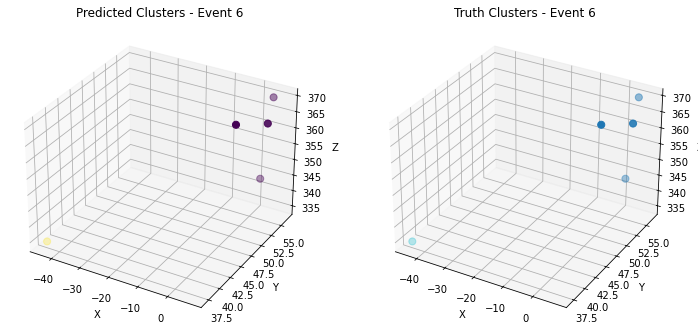

Processing Event 7/3530...


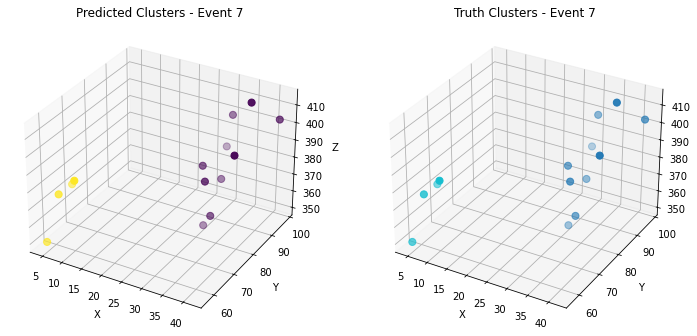

Processing Event 8/3530...


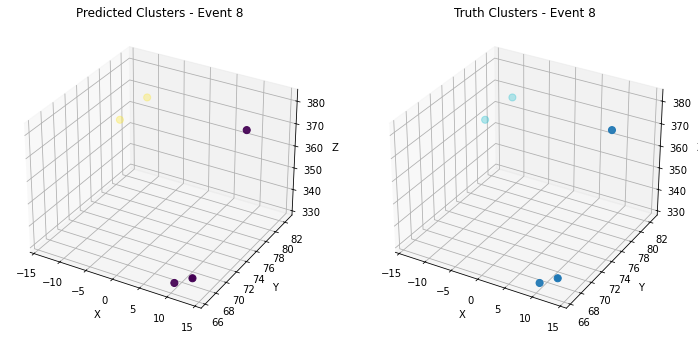

Processing Event 9/3530...


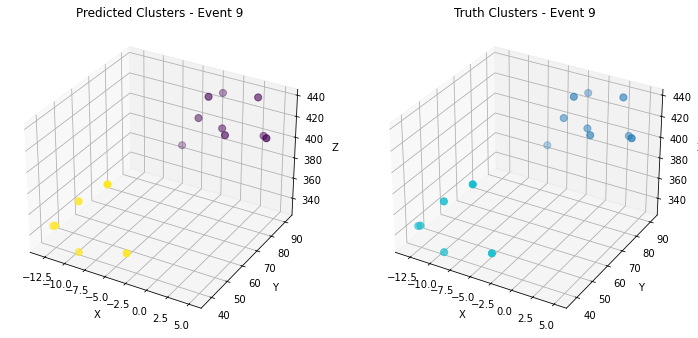

Processing Event 10/3530...


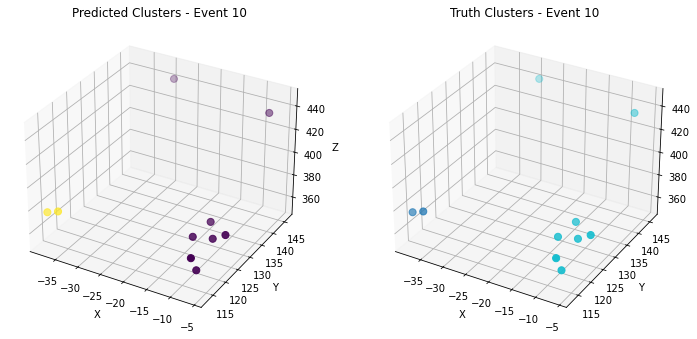

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Function to plot clusters
def plot_clusters(event_idx, xyz_coords, cluster_labels, truth_labels):
    fig = plt.figure(figsize=(12, 6))  # Set up the figure for side-by-side plots

    # Plot 1: Predicted clusters
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(xyz_coords[:, 0], xyz_coords[:, 1], xyz_coords[:, 2], c=cluster_labels, cmap='viridis', s=50)
    ax1.set_title(f"Predicted Clusters - Event {event_idx+1}")
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')

    # Plot 2: Truth clusters
    ax2 = fig.add_subplot(122, projection='3d')
    truth_colors = [label[0] for label in truth_labels]  # Use first entry of SimLabels as the cluster assignment
    ax2.scatter(xyz_coords[:, 0], xyz_coords[:, 1], xyz_coords[:, 2], c=truth_colors, cmap='tab10', s=50)
    ax2.set_title(f"Truth Clusters - Event {event_idx+1}")
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')

    plt.show()

# Loop over all events
for event_idx in range(10):
    print(f"Processing Event {event_idx+1}/{len(data_test)}...")

    # Extract data
    xyz_coords = data_test[event_idx].x[:, :3]  # Get x, y, z coordinates
    cluster_labels = all_cluster_labels[event_idx]  # Predicted cluster labels
    truth_labels = data_test[event_idx].assoc  # True SimLabels

    # Convert to numpy if not already
    xyz_coords = xyz_coords.cpu().numpy() if isinstance(xyz_coords, torch.Tensor) else xyz_coords
    cluster_labels = np.array(cluster_labels)
    truth_labels = np.array(truth_labels)

    # Plot for the current event
    plot_clusters(event_idx, xyz_coords, cluster_labels, truth_labels)


# Score Calculations

In [8]:
import torch
import numpy as np
from tqdm import tqdm  # For progress visualization
import pandas as pd
import logging

# Setup Logging
logging.basicConfig(filename='processing_errors.log', level=logging.ERROR,
                    format='%(asctime)s %(levelname)s:%(message)s')

# Initialize a list to store scores for all events
all_scores = []

# Determine the number of events
num_events = len(data_test)

# Iterate over all events with a progress bar
for event_idx in tqdm(range(num_events), desc="Processing Events"):
    try:
        event = data_test[event_idx]

        # Extract x, y, z, energy, and eta
        if isinstance(event.x, torch.Tensor):
            positions = event.x[:, :3].numpy()  # Extract x, y, z
            energies = event.x[:, 3].numpy()
            etas = event.x[:, 4].numpy()
        else:
            positions = event.x[:, :3]
            energies = event.x[:, 3]
            etas = event.x[:, 4]

        positions = np.array(positions)
        energies = np.array(energies)
        etas = np.array(etas)

        # Extract true labels and predicted labels
        true_labels_event = event.assoc[:, 0]
        true_cp_labels = true_labels_event.int().numpy() if isinstance(true_labels_event, torch.Tensor) else true_labels_event.astype(int)
        pred_trackster_labels = np.array(all_cluster_labels[event_idx])

        # Identify unique CP IDs and Trackster IDs
        cp_ids = np.unique(true_cp_labels)
        trackster_ids = np.unique(pred_trackster_labels)

        if len(cp_ids) == 0 or len(trackster_ids) == 0:
            # Handle empty associations
            all_scores.append({
                'event_index': event_idx,
                'cp_id': None,
                'trackster_id': None,
                'sim_to_reco_score': 1.0,
                'reco_to_sim_score': 1.0,
                'cp_energy': 0.0,
                'trackster_energy': 0.0,
                'cp_avg_eta': 0.0,
                'cp_separation': 0.0,
                'energy_diff_ratio': None
            })
            continue

        # Create dictionaries mapping cluster IDs to their particle indices
        cp_clusters = {cp: np.where(true_cp_labels == cp)[0] for cp in cp_ids}
        tst_clusters = {t: np.where(pred_trackster_labels == t)[0] for t in trackster_ids}

        # Compute average positions for each true CP cluster
        cp_avg_positions = {cp: np.mean(positions[indices], axis=0) for cp, indices in cp_clusters.items()}

        # Compute separation between two CP clusters if at least 2 exist
        if len(cp_ids) >= 2:
            cp_separation = np.linalg.norm(cp_avg_positions[cp_ids[0]] - cp_avg_positions[cp_ids[1]])
        else:
            cp_separation = 0.0

        # Compute total energy and average eta for each CP cluster
        cp_total_energy = {cp: np.sum(energies[indices]) for cp, indices in cp_clusters.items()}
        cp_avg_eta = {cp: np.mean(etas[indices]) for cp, indices in cp_clusters.items()}

        # Compute total energy for each Trackster cluster
        tst_total_energy = {t: np.sum(energies[indices]) for t, indices in tst_clusters.items()}

        # Initialize dictionaries to store scores for this event
        sim_to_reco_scores = {}
        reco_to_sim_scores = {}

        # Compute Sim-to-Reco and Reco-to-Sim Scores
        for cp in cp_ids:
            for tst in trackster_ids:
                cp_indices = cp_clusters[cp]
                tst_indices = tst_clusters[tst]

                if cp_total_energy[cp] == 0 or np.sum(energies[tst_indices]) == 0:
                    sim_to_reco_scores[(cp, tst)] = 0.0
                    reco_to_sim_scores[(tst, cp)] = 1.0
                    continue

                # Sim-to-Reco Score
                fr_sc_i_mc = {k: energies[k] / cp_total_energy[cp] for k in cp_indices}
                fr_tst_j_reco = {
                    k: (energies[k] / np.sum(energies[tst_indices]) if k in tst_indices else 0.0)
                    for k in cp_indices
                }
                numerator = sum((fr_tst_j_reco[k] - fr_sc_i_mc[k]) ** 2 * energies[k] ** 2 for k in cp_indices)
                denominator = (sum(fr_sc_i_mc[h] * energies[h] for h in cp_indices)) ** 2
                sim_score = numerator / denominator if denominator != 0 else 0.0

                # Reco-to-Sim Score
                fr_tst_i_reco = {k: energies[k] / np.sum(energies[tst_indices]) for k in tst_indices}
                fr_sc_j_mc = {k: energies[k] / cp_total_energy[cp] if k in cp_indices else 0.0 for k in tst_indices}
                numerator_reco = sum((fr_tst_i_reco[k] - fr_sc_j_mc[k]) ** 2 * energies[k] ** 2 for k in tst_indices)
                denominator_reco = (sum(fr_tst_i_reco[h] * energies[h] for h in tst_indices)) ** 2
                reco_score = numerator_reco / denominator_reco if denominator_reco != 0 else 0.0

                # Calculate energy difference ratio
                energy_diff_ratio = (tst_total_energy[tst] - cp_total_energy[cp]) / cp_total_energy[cp]

                # Append to all_scores
                all_scores.append({
                    'event_index': event_idx,
                    'cp_id': cp,
                    'trackster_id': tst,
                    'sim_to_reco_score': sim_score,
                    'reco_to_sim_score': reco_score,
                    'cp_energy': cp_total_energy[cp],
                    'trackster_energy': tst_total_energy[tst],
                    'cp_avg_eta': cp_avg_eta[cp],
                    'cp_separation': cp_separation,
                    'energy_diff_ratio': energy_diff_ratio
                })

    except Exception as e:
        logging.error(f"Error processing event {event_idx}: {e}")
        all_scores.append({
            'event_index': event_idx,
            'cp_id': None,
            'trackster_id': None,
            'sim_to_reco_score': 1.0,
            'reco_to_sim_score': 1.0,
            'cp_energy': 0.0,
            'trackster_energy': 0.0,
            'cp_avg_eta': 0.0,
            'cp_separation': 0.0,
            'energy_diff_ratio': None
        })

# Convert all_scores to a DataFrame
df_scores = pd.DataFrame(all_scores, columns=[
    'event_index',
    'cp_id',
    'trackster_id',
    'sim_to_reco_score',
    'reco_to_sim_score',
    'cp_energy',
    'trackster_energy',
    'cp_avg_eta',
    'cp_separation',
    'energy_diff_ratio'
])

# Display the DataFrame
print(df_scores.head())

Processing Events: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3530/3530 [00:16<00:00, 219.90it/s]


   event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score  \
0            0    0.0           0.0           0.000000           0.000000   
1            0    0.0           1.0           0.997793           0.988900   
2            0    1.0           0.0           0.988900           0.997793   
3            0    1.0           1.0           0.000000           0.000000   
4            1    0.0           0.0           0.988720           0.791945   

   cp_energy  trackster_energy  cp_avg_eta  cp_separation  energy_diff_ratio  
0  45.490387         45.490387    1.887023      68.403633           0.000000  
1  45.490387         28.819340    1.887023      68.403633          -0.366474  
2  28.819340         45.490387    2.683286      68.403633           0.578467  
3  28.819340         28.819340    2.683286      68.403633           0.000000  
4  46.477142         43.417011    1.597911      71.320656          -0.065842  


In [9]:
import pandas as pd

# Placeholder for data_test (replace with your actual dataset)
# Example structure:
# data_test[i].StR_score -> tensor for SimToReco
# data_test[i].RtS_score -> tensor for RecoToSim

# Simulated data for demonstration
class EventData:
    def __init__(self, StR_score, RtS_score):
        self.StR_score = StR_score
        self.RtS_score = RtS_score

# Initialize an empty list for all event data
data = []

# Loop through each event in data_test
for event_index, event in enumerate(data_test):
    StR_score = event.StR_score  # SimToReco tensor
    RtS_score = event.RtS_score  # RecoToSim tensor
    
    # Determine dimensions
    num_cps = len(StR_score)  # Number of calo particles
    num_tracksters = len(RtS_score)  # Number of tracksters
    
    # Map scores
    for cp_id in range(num_cps):
        for trackster_id in range(num_tracksters):
            # Extract scalar values from tensors if they are tensors
            sim_to_reco_score = (
                StR_score[cp_id][trackster_id].item() 
                if hasattr(StR_score[cp_id][trackster_id], 'item') 
                else StR_score[cp_id][trackster_id]
            )
            reco_to_sim_score = (
                RtS_score[trackster_id][cp_id].item() 
                if hasattr(RtS_score[trackster_id][cp_id], 'item') 
                else RtS_score[trackster_id][cp_id]
            )
            
            # Append row to data list
            data.append({
                'event_index': event_index,
                'cp_id': cp_id,
                'trackster_id': trackster_id,
                'sim_to_reco_score': sim_to_reco_score,
                'reco_to_sim_score': reco_to_sim_score
            })

# Create DataFrame
df_CERN = pd.DataFrame(data)

# Display the resulting DataFrame
print(df_CERN)

       event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score
0                0      0             0           0.202020       5.831018e-07
1                0      0             1           1.000000       4.605221e-05
2                0      0             2           1.000000       0.000000e+00
3                0      1             0           0.518250       1.000000e+00
4                0      1             1           0.971559       1.000000e+00
...            ...    ...           ...                ...                ...
25125         3529      0             1           1.000000       0.000000e+00
25126         3529      0             2           1.000000       0.000000e+00
25127         3529      1             0           0.011682       1.000000e+00
25128         3529      1             1           0.999408       1.000000e+00
25129         3529      1             2           1.000000       1.000000e+00

[25130 rows x 5 columns]


# Purity + Efficiency

In [10]:
import pandas as pd

# Ensure 'cp_id' and 'trackster_id' are numeric for both dataframes
df_scores['cp_id'] = pd.to_numeric(df_scores['cp_id'], errors='coerce')
df_scores['trackster_id'] = pd.to_numeric(df_scores['trackster_id'], errors='coerce')

df_CERN['cp_id'] = pd.to_numeric(df_CERN['cp_id'], errors='coerce')
df_CERN['trackster_id'] = pd.to_numeric(df_CERN['trackster_id'], errors='coerce')

# Define a function to calculate efficiency and purity
def calculate_efficiency_purity(df, model_name):
    # ----- Efficiency Calculation -----
    cp_valid = df.dropna(subset=['cp_id']).copy()
    cp_grouped = cp_valid.groupby(['event_index', 'cp_id'])
    cp_associated = cp_grouped['sim_to_reco_score'].min() < 0.2
    num_associated_cp = cp_associated.sum()
    total_cp = cp_associated.count()
    efficiency = num_associated_cp / total_cp if total_cp > 0 else 0

    # ----- Purity Calculation -----
    tst_valid = df.dropna(subset=['trackster_id']).copy()
    tst_grouped = tst_valid.groupby(['event_index', 'trackster_id'])
    tst_associated = tst_grouped['reco_to_sim_score'].min() < 0.2
    num_associated_tst = tst_associated.sum()
    total_tst = tst_associated.count()
    purity = num_associated_tst / total_tst if total_tst > 0 else 0

    # Print results for the model
    print(f"\nModel: {model_name}")
    print(f"Efficiency: {efficiency:.4f} ({num_associated_cp} associated CPs out of {total_cp} total CPs)")
    print(f"Purity: {purity:.4f} ({num_associated_tst} associated Tracksters out of {total_tst} total Tracksters)")
    return cp_valid, tst_valid
# Calculate for both models
cp_valid, tst_valid = calculate_efficiency_purity(df_scores, "Your Model")

calculate_efficiency_purity(df_CERN, "CERN Model")



Model: Your Model
Efficiency: 0.9654 (6646 associated CPs out of 6884 total CPs)
Purity: 0.9474 (6580 associated Tracksters out of 6945 total Tracksters)

Model: CERN Model
Efficiency: 0.3339 (2352 associated CPs out of 7044 total CPs)
Purity: 0.9930 (12477 associated Tracksters out of 12565 total Tracksters)


(       event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score
 0                0      0             0           0.202020       5.831018e-07
 1                0      0             1           1.000000       4.605221e-05
 2                0      0             2           1.000000       0.000000e+00
 3                0      1             0           0.518250       1.000000e+00
 4                0      1             1           0.971559       1.000000e+00
 ...            ...    ...           ...                ...                ...
 25125         3529      0             1           1.000000       0.000000e+00
 25126         3529      0             2           1.000000       0.000000e+00
 25127         3529      1             0           0.011682       1.000000e+00
 25128         3529      1             1           0.999408       1.000000e+00
 25129         3529      1             2           1.000000       1.000000e+00
 
 [25130 rows x 5 columns],
        event_index  cp

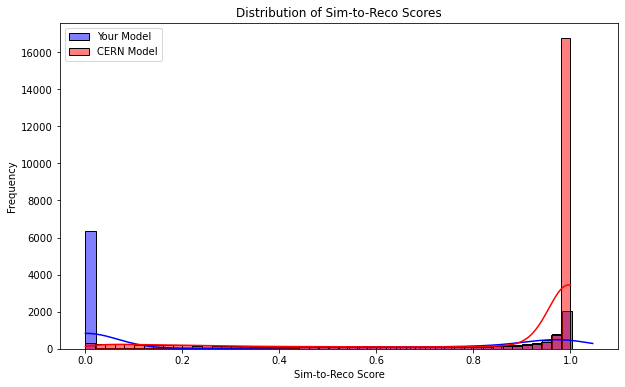

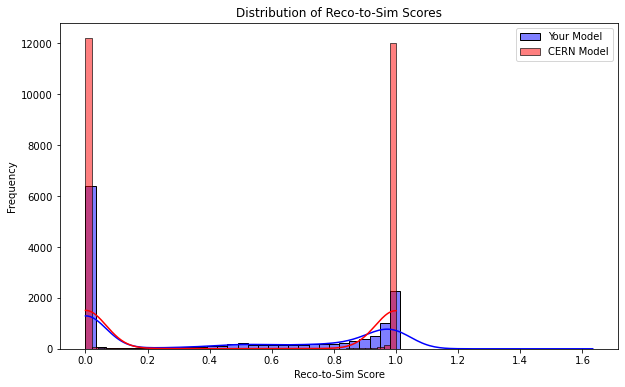

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Plotting Sim-to-Reco Score Distribution -----
plt.figure(figsize=(10, 6))
sns.histplot(cp_valid['sim_to_reco_score'], bins=50, kde=True, label='Your Model', color='blue')
sns.histplot(df_CERN['sim_to_reco_score'], bins=50, kde=True, label='CERN Model', color='red')
plt.title('Distribution of Sim-to-Reco Scores')
plt.xlabel('Sim-to-Reco Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# ----- Plotting Reco-to-Sim Score Distribution -----
plt.figure(figsize=(10, 6))
sns.histplot(tst_valid['reco_to_sim_score'], bins=50, kde=True, label='Your Model', color='blue')
sns.histplot(df_CERN['reco_to_sim_score'], bins=50, kde=True, label='CERN Model', color='red')
plt.title('Distribution of Reco-to-Sim Scores')
plt.xlabel('Reco-to-Sim Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Plot vs params

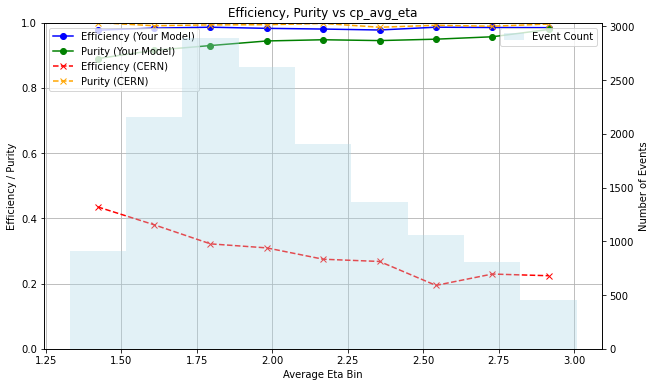

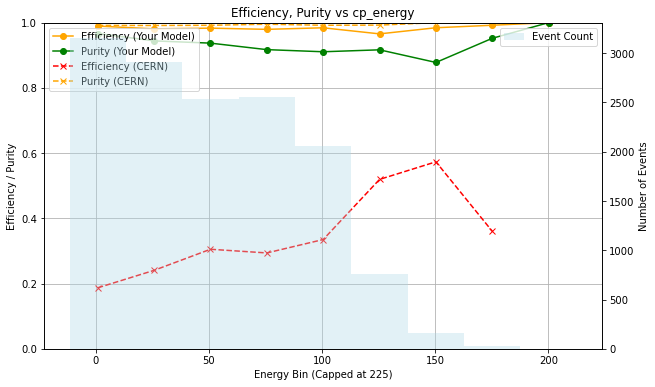

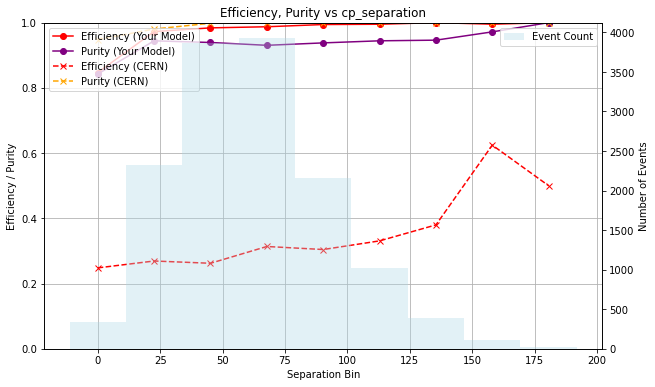

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---- Preprocessing ----
df_scores['cp_id'] = pd.to_numeric(df_scores['cp_id'], errors='coerce')
df_scores['trackster_id'] = pd.to_numeric(df_scores['trackster_id'], errors='coerce')

df_CERN['cp_id'] = pd.to_numeric(df_CERN['cp_id'], errors='coerce')
df_CERN['trackster_id'] = pd.to_numeric(df_CERN['trackster_id'], errors='coerce')

# Map Required Columns from df_scores to df_CERN
event_mapping = df_scores[['event_index', 'cp_avg_eta', 'cp_energy', 'cp_separation']].drop_duplicates('event_index')
df_CERN = pd.merge(df_CERN, event_mapping, on='event_index', how='left')

# ---- Efficiency and Purity Calculation ----
def calculate_efficiency_purity(df):
    # Efficiency
    cp_valid = df.dropna(subset=['cp_id']).copy()
    cp_grouped = cp_valid.groupby(['event_index', 'cp_id'])
    cp_associated = cp_grouped['sim_to_reco_score'].min() < 0.2
    cp_efficiency = cp_associated.groupby(level=0).mean().reset_index(name='efficiency')
    cp_valid = cp_valid.merge(cp_efficiency, on='event_index', how='left')

    # Purity
    tst_valid = df.dropna(subset=['trackster_id']).copy()
    tst_grouped = tst_valid.groupby(['event_index', 'trackster_id'])
    tst_associated = tst_grouped['reco_to_sim_score'].min() < 0.2
    tst_purity = tst_associated.groupby(level=0).mean().reset_index(name='purity')
    tst_valid = tst_valid.merge(tst_purity, on='event_index', how='left')

    # Merge into a single DataFrame
    df_plot = pd.merge(cp_valid[['event_index', 'cp_avg_eta', 'cp_energy', 'cp_separation', 'efficiency']],
                       tst_valid[['event_index', 'purity']],
                       on='event_index',
                       how='inner')
    return df_plot

df_plot = calculate_efficiency_purity(df_scores)
df_plot_CERN = calculate_efficiency_purity(df_CERN)

# ---- Binning ----
eta_bins = np.linspace(df_plot['cp_avg_eta'].min(), df_plot['cp_avg_eta'].max(), 10)
energy_bins = np.linspace(df_plot['cp_energy'].min(), 225, 10)  # Capped at 225
separation_bins = np.linspace(df_plot['cp_separation'].min(), df_plot['cp_separation'].max(), 10)

df_plot['eta_bin'] = pd.cut(df_plot['cp_avg_eta'], bins=eta_bins, labels=False, include_lowest=True)
df_plot['energy_bin'] = pd.cut(df_plot['cp_energy'], bins=energy_bins, labels=False, include_lowest=True)
df_plot['separation_bin'] = pd.cut(df_plot['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)

df_plot_CERN['eta_bin'] = pd.cut(df_plot_CERN['cp_avg_eta'], bins=eta_bins, labels=False, include_lowest=True)
df_plot_CERN['energy_bin'] = pd.cut(df_plot_CERN['cp_energy'], bins=energy_bins, labels=False, include_lowest=True)
df_plot_CERN['separation_bin'] = pd.cut(df_plot_CERN['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)

def calculate_bin_error(numerator, denominator):
    if denominator > 0:
        efficiency = numerator / denominator
        error = np.sqrt(efficiency * (1 - efficiency) / denominator)
    else:
        efficiency = 0.0
        error = 0.0
    return efficiency, error

def aggregate_bins(data, bin_col):
    return data.groupby(bin_col).apply(lambda g: pd.Series({
        'efficiency_mean': g['efficiency'].mean(),
        'efficiency_error': calculate_bin_error(g['efficiency'].sum(), len(g))[1],
        'purity_mean': g['purity'].mean(),
        'purity_error': calculate_bin_error(g['purity'].sum(), len(g))[1],
        'count': len(g) // 4
    })).reset_index()

# Aggregate Data
eta_group = aggregate_bins(df_plot, 'eta_bin').set_index('eta_bin').reindex(range(len(eta_bins) - 1)).reset_index()
energy_group = aggregate_bins(df_plot, 'energy_bin').set_index('energy_bin').reindex(range(len(energy_bins) - 1)).reset_index()
separation_group = aggregate_bins(df_plot, 'separation_bin').set_index('separation_bin').reindex(range(len(separation_bins) - 1)).reset_index()

eta_group_CERN = aggregate_bins(df_plot_CERN, 'eta_bin').set_index('eta_bin').reindex(range(len(eta_bins) - 1)).reset_index()
energy_group_CERN = aggregate_bins(df_plot_CERN, 'energy_bin').set_index('energy_bin').reindex(range(len(energy_bins) - 1)).reset_index()
separation_group_CERN = aggregate_bins(df_plot_CERN, 'separation_bin').set_index('separation_bin').reindex(range(len(separation_bins) - 1)).reset_index()

# Fill Missing Values
for group in [eta_group_CERN, energy_group_CERN, separation_group_CERN]:
    group.fillna({'efficiency_mean': np.nan, 'efficiency_error': np.nan,
                  'purity_mean': np.nan, 'purity_error': np.nan, 'count': 0}, inplace=True)

# ---- Plotting ----
def plot_metric(x_bins, group, group_CERN, xlabel, ylabel, title, efficiency_color, purity_color):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    # Your Model
    ax1.plot(x_bins, group['efficiency_mean'], marker='o', linestyle='-', color=efficiency_color, label='Efficiency (Your Model)')
    ax1.plot(x_bins, group['purity_mean'], marker='o', linestyle='-', color=purity_color, label='Purity (Your Model)')

    # CERN Model
    ax1.plot(x_bins, group_CERN['efficiency_mean'], marker='x', linestyle='--', color='red', label='Efficiency (CERN)')
    ax1.plot(x_bins, group_CERN['purity_mean'], marker='x', linestyle='--', color='orange', label='Purity (CERN)')

    ax1.set_ylim(0, 1)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.legend(loc='upper left')
    ax1.grid()

    ax2.bar(x_bins, group['count'], width=(x_bins[1] - x_bins[0]), color='lightblue', alpha=0.35, label='Event Count')
    ax2.set_ylabel('Number of Events')
    ax2.legend(loc='upper right')

    plt.title(title)
    plt.show()

# Plot Each Metric
plot_metric(eta_bins[:-1], eta_group, eta_group_CERN, 'Average Eta Bin', 'Efficiency / Purity', 'Efficiency, Purity vs cp_avg_eta', 'blue', 'green')
plot_metric(energy_bins[:-1], energy_group, energy_group_CERN, 'Energy Bin (Capped at 225)', 'Efficiency / Purity', 'Efficiency, Purity vs cp_energy', 'orange', 'green')
plot_metric(separation_bins[:-1], separation_group, separation_group_CERN, 'Separation Bin', 'Efficiency / Purity', 'Efficiency, Purity vs cp_separation', 'red', 'purple')


# Plotting Sigma

/tmp/ipykernel_2512189/1461127319.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  associated_scores['separation_bin'] = pd.cut(associated_scores['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)


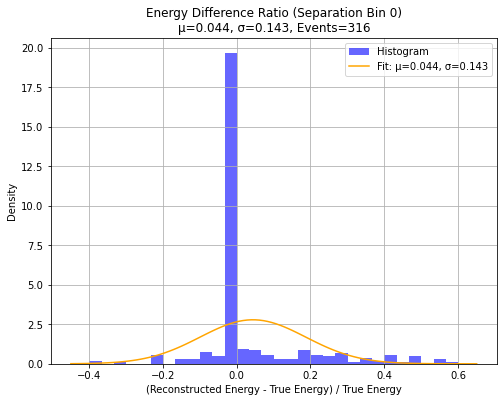

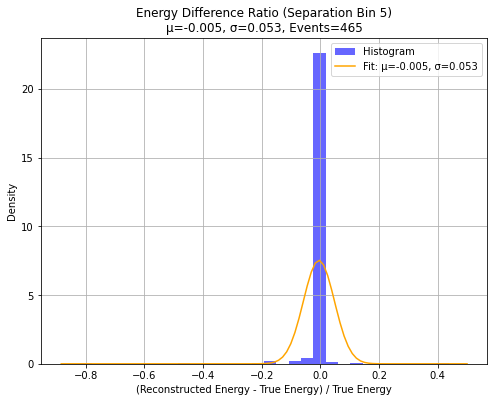

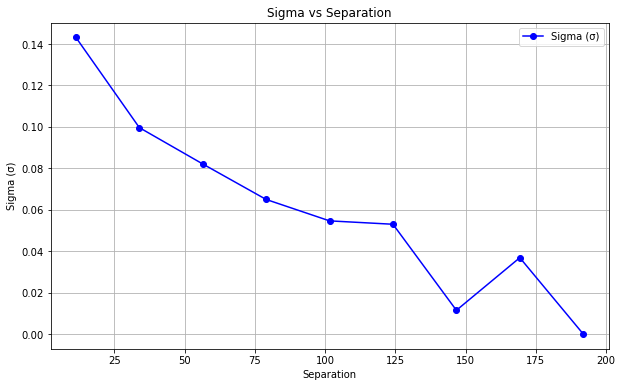

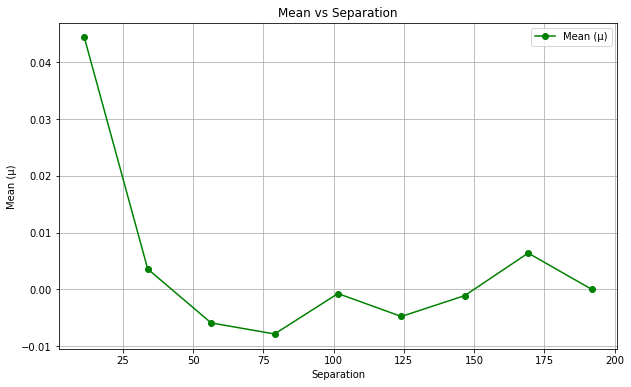

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Filter to include only associated events (reco-to-sim score < 0.2)
associated_scores = df_scores[df_scores['reco_to_sim_score'] < 0.2]

# Define bins for cp_separation
separation_bins = np.linspace(associated_scores['cp_separation'].min(), associated_scores['cp_separation'].max(), 10)
associated_scores['separation_bin'] = pd.cut(associated_scores['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)

# Initialize lists to store results
separation_bin_centers = []
sigma_values = []
mean_values = []
event_counts = []

# Loop through each separation bin
for bin_idx in range(len(separation_bins) - 1):
    # Select data for the current bin
    bin_data = associated_scores[associated_scores['separation_bin'] == bin_idx]['energy_diff_ratio']
    
    # Skip if no data in this bin
    if bin_data.empty:
        continue
    
    # Fit a Gaussian to the data
    mu, sigma = norm.fit(bin_data)
    
    # Store results
    bin_center = (separation_bins[bin_idx] + separation_bins[bin_idx + 1]) / 2
    separation_bin_centers.append(bin_center)
    sigma_values.append(sigma)
    mean_values.append(mu)
    event_counts.append(len(bin_data))

    # Plot a couple of example histograms for reference
    if bin_idx == 0 or bin_idx == len(separation_bins) // 2:  # Example: First and middle bins
        plt.figure(figsize=(8, 6))
        plt.hist(bin_data, bins=30, density=True, alpha=0.6, color='blue', label='Histogram')
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, sigma)
        plt.plot(x, p, 'orange', label=f'Fit: μ={mu:.3f}, σ={sigma:.3f}')
        plt.title(f'Energy Difference Ratio (Separation Bin {bin_idx})\nμ={mu:.3f}, σ={sigma:.3f}, Events={len(bin_data)}')
        plt.xlabel('(Reconstructed Energy - True Energy) / True Energy')
        plt.ylabel('Density')
        plt.legend()
        plt.grid()
        plt.show()

# Plot σ (sigma) vs Separation
plt.figure(figsize=(10, 6))
plt.plot(separation_bin_centers, sigma_values, 'o-', label='Sigma (σ)', color='blue')
plt.xlabel('Separation')
plt.ylabel('Sigma (σ)')
plt.title('Sigma vs Separation')
plt.grid()
plt.legend()
plt.show()

# Plot μ (mean) vs Separation
plt.figure(figsize=(10, 6))
plt.plot(separation_bin_centers, mean_values, 'o-', label='Mean (μ)', color='green')
plt.xlabel('Separation')
plt.ylabel('Mean (μ)')
plt.title('Mean vs Separation')
plt.grid()
plt.legend()
plt.show()


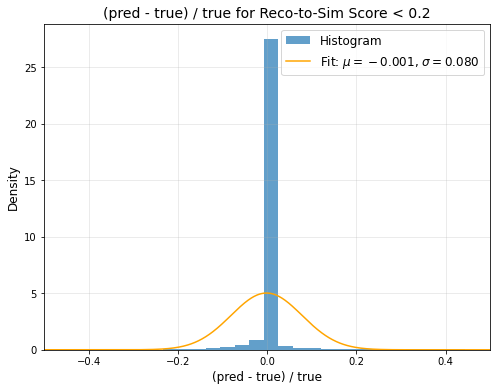

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_scores is your DataFrame with all the relevant data
# Filter the DataFrame for reco-to-sim scores < 0.2
filtered_df = df_scores[df_scores['reco_to_sim_score'] < 0.2]

# Calculate the (pred - true) / true for energy_diff_ratio (or adjust the column name as needed)
# Assuming 'energy_diff_ratio' is the column of interest for (pred - true) / true
values = filtered_df['energy_diff_ratio']

# Plot the histogram
plt.figure(figsize=(8, 6))
counts, bins, patches = plt.hist(values, bins=50, density=True, alpha=0.7, label='Histogram')

# Fit a Gaussian distribution to the data
mu, sigma = np.mean(values), np.std(values)
x = np.linspace(bins[0], bins[-1], 1000)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)
plt.plot(x, pdf, label=f'Fit: $\mu={mu:.3f}$, $\sigma={sigma:.3f}$', color='orange')

# Add labels and title
plt.title('(pred - true) / true for Reco-to-Sim Score < 0.2', fontsize=14)
plt.xlim(-0.5, 0.5)
plt.xlabel('(pred - true) / true', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Save or show the plot
plt.show()


/tmp/ipykernel_2512189/776054542.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reconstructed_df['energy_bin'] = pd.cut(reconstructed_df['trackster_energy'], bins=energy_bins)


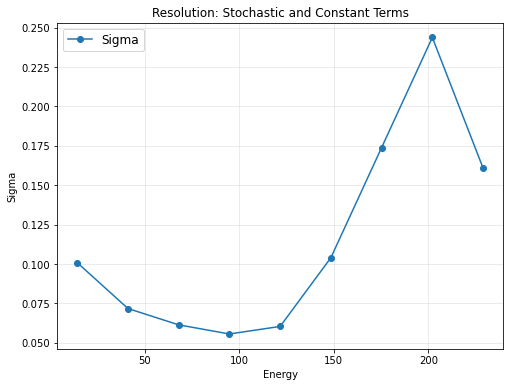

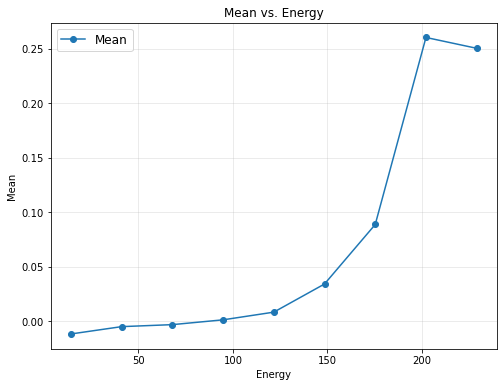

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Assuming df_scores is your DataFrame with all the relevant data
# Filter the DataFrame for tracksters that have been reconstructed (reco_to_sim_score < 0.2)
reconstructed_df = df_scores[df_scores['reco_to_sim_score'] < 0.2]

# Group the data into energy bins
energy_bins = np.linspace(reconstructed_df['trackster_energy'].min(), reconstructed_df['trackster_energy'].max(), 10)
reconstructed_df['energy_bin'] = pd.cut(reconstructed_df['trackster_energy'], bins=energy_bins)

# Initialize lists to store results
bin_centers = []
sigmas = []
means = []

# Loop over each bin
for energy_bin, group in reconstructed_df.groupby('energy_bin'):
    if group.empty:
        continue

    # Calculate the bin center
    bin_center = (energy_bin.left + energy_bin.right) / 2
    bin_centers.append(bin_center)

    # Fit a Gaussian to the (pred - true) / true values
    values = group['energy_diff_ratio']
    mu, sigma = norm.fit(values)

    # Store the mean and sigma
    means.append(mu)
    sigmas.append(sigma)

# Plot sigma vs. energy
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, sigmas, 'o-', label='Sigma')
plt.title('Resolution: Stochastic and Constant Terms')
plt.xlabel('Energy')
plt.ylabel('Sigma')
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

# Plot mean vs. energy
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, means, 'o-', label='Mean')
plt.title('Mean vs. Energy')
plt.xlabel('Energy')
plt.ylabel('Mean')
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()


# ROC curve

In [ ]:
print()

Error processing event 1195: index 0 is out of bounds for dimension 1 with size 0
Error processing event 1940: index 0 is out of bounds for dimension 1 with size 0
Error processing event 1195: index 0 is out of bounds for dimension 1 with size 0
Error processing event 1940: index 0 is out of bounds for dimension 1 with size 0
Error processing event 1195: index 0 is out of bounds for dimension 1 with size 0
Error processing event 1940: index 0 is out of bounds for dimension 1 with size 0
Error processing event 1195: index 0 is out of bounds for dimension 1 with size 0
Error processing event 1940: index 0 is out of bounds for dimension 1 with size 0
Error processing event 1195: index 0 is out of bounds for dimension 1 with size 0
Error processing event 1940: index 0 is out of bounds for dimension 1 with size 0
Error processing event 1195: index 0 is out of bounds for dimension 1 with size 0
Error processing event 1940: index 0 is out of bounds for dimension 1 with size 0
Error processing

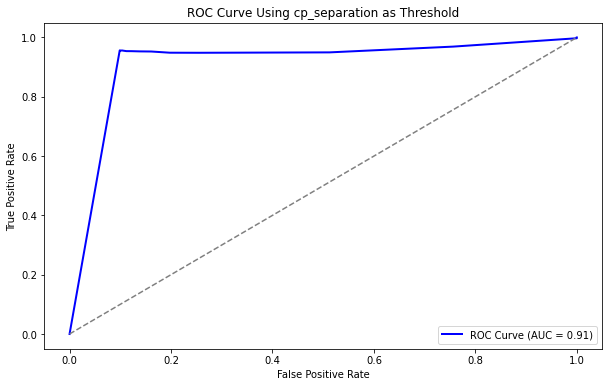

In [28]:
from itertools import combinations
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

separation_thresholds = np.arange(0, df_scores['cp_separation'].max() + 10, 10)


# Initialize lists for ROC points
tpr_list = []
fpr_list = []

# Loop over separation thresholds
for threshold in separation_thresholds:
    global_TP = 0  # True Positives
    global_FP = 0  # False Positives
    global_FN = 0  # False Negatives
    global_TN = 0  # True Negatives

    # Filter events by separation threshold
    valid_events = df_scores[df_scores['cp_separation'] <= threshold]['event_index'].unique()

    for event_idx in valid_events:
        try:
            # Extract event data
            event = data_test[event_idx]
            true_labels_event = event.assoc[:, 0]  # Ground truth cluster labels
            pred_trackster_labels = np.array(all_cluster_labels[event_idx])  # Predicted labels

            # Generate all possible pairs of tracksters
            trackster_pairs = list(combinations(range(len(true_labels_event)), 2))

            # Initialize sets
            P_V = set()  # Ground truth pairs
            P_U = set()  # Predicted pairs
            P_X = set(trackster_pairs)  # All pairs

            for i, j in trackster_pairs:
                if true_labels_event[i] == true_labels_event[j]:
                    P_V.add((i, j))  # Ground truth edge
                if pred_trackster_labels[i] == pred_trackster_labels[j]:
                    P_U.add((i, j))  # Predicted edge

            # Calculate Confusion Matrix
            TP = len(P_V & P_U)  # True Positive
            FN = len(P_V - P_U)  # False Negative
            FP = len(P_U - P_V)  # False Positive
            TN = len(P_X - (P_V | P_U))  # True Negative

            # Update global counts
            global_TP += TP
            global_FP += FP
            global_FN += FN
            global_TN += TN

        except Exception as e:
            print(f"Error processing event {event_idx}: {e}")
            continue

    # Calculate TPR and FPR for the current threshold
    global_TPR = global_TP / (global_TP + global_FN) if (global_TP + global_FN) > 0 else 0
    global_FPR = global_FP / (global_FP + global_TN) if (global_FP + global_TN) > 0 else 0

    # Append to lists
    tpr_list.append(global_TPR)
    fpr_list.append(global_FPR)
    
# Check conditions for removing the first point
if len(fpr_list) > 1 and len(tpr_list) > 1:
    if (fpr_list[1] > fpr_list[0]) or (tpr_list[1] <= tpr_list[0]):
        print("Removing the first point from fpr_list and tpr_list due to conditions.")
        fpr_list.pop(0)
        tpr_list.pop(0)
        
# Ensure (0,0) and (1,1) are included
if (0.0, 0.0) not in filtered_points:
    fpr_list.insert(0, 1.0)
    tpr_list.insert(0, 1.0)
if (1.0, 1.0) not in filtered_points:
    fpr_list.append(0.0)
    tpr_list.append(0.0)



# Plot ROC Curve
roc_auc = auc(fpr_list, tpr_list)
plt.figure(figsize=(10, 6))
plt.plot(fpr_list, tpr_list, lw=2, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random guessing baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Using cp_separation as Threshold')
plt.legend(loc="lower right")
plt.show()


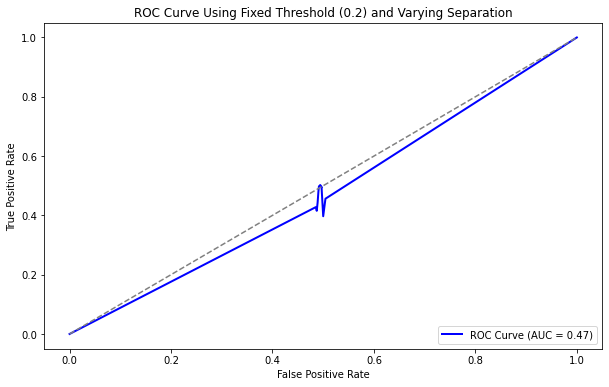

In [27]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define separation thresholds (e.g., 0, 5, 10, ..., max separation in dataset)
separation_thresholds = np.arange(0, df_scores['cp_separation'].max() + 10, 10)
score_threshold = 0.2  # Fixed threshold for both scores

# Initialize lists for ROC points
tpr_list = []
fpr_list = []

# Loop over separation thresholds
for separation in separation_thresholds:
    global_TP = 0  # True Positives
    global_FP = 0  # False Positives
    global_FN = 0  # False Negatives
    global_TN = 0  # True Negatives

    # Filter events by cp_separation threshold
    valid_events = df_CERN[df_CERN['cp_separation'] <= separation]['event_index'].unique()

    for event_idx in valid_events:
        try:
            # Filter pairs for this event
            event_pairs = df_CERN[df_CERN['event_index'] == event_idx]
            
            # Extract scores
            sim_to_reco_scores = event_pairs['sim_to_reco_score'].values
            reco_to_sim_scores = event_pairs['reco_to_sim_score'].values

            # Loop through each pair
            for sim_score, reco_score in zip(sim_to_reco_scores, reco_to_sim_scores):
                if sim_score < score_threshold and reco_score < score_threshold:
                    global_TP += 1  # True Positive
                elif reco_score < score_threshold and sim_score > score_threshold:
                    global_FP += 1  # False Positive
                elif sim_score < score_threshold and reco_score > score_threshold:
                    global_FN += 1  # False Negative
                elif sim_score > score_threshold and reco_score > score_threshold:
                    global_TN += 1  # True Negative

        except Exception as e:
            print(f"Error processing event {event_idx}: {e}")
            continue

    # Calculate TPR and FPR for the current separation threshold
    global_TPR = global_TP / (global_TP + global_FN) if (global_TP + global_FN) > 0 else 0
    global_FPR = global_FP / (global_FP + global_TN) if (global_FP + global_TN) > 0 else 0

    # Append to lists
    tpr_list.append(global_TPR)
    fpr_list.append(global_FPR)

# Pair FPR and TPR together
roc_points = list(zip(fpr_list, tpr_list))

# Sort by FPR in descending order
roc_points.sort(key=lambda x: x[0], reverse=True)

# Remove non-monotonic points
filtered_points = []
prev_fpr = float('inf')  # Start with a very large value for FPR

for fpr, tpr in roc_points:
    if fpr <= prev_fpr:
        filtered_points.append((fpr, tpr))
        prev_fpr = fpr

# Unzip into FPR and TPR lists
fpr_list, tpr_list = zip(*filtered_points)

# Convert back to lists
fpr_list = list(fpr_list)
tpr_list = list(tpr_list)

# Ensure (0,0) and (1,1) are included
if (0.0, 0.0) not in filtered_points:
    fpr_list.insert(0, 1.0)
    tpr_list.insert(0, 1.0)
if (1.0, 1.0) not in filtered_points:
    fpr_list.append(0.0)
    tpr_list.append(0.0)



# Plot ROC Curve
roc_auc = auc(fpr_list, tpr_list)
plt.figure(figsize=(10, 6))
plt.plot(fpr_list, tpr_list, lw=2, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random guessing baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Using Fixed Threshold (0.2) and Varying Separation')
plt.legend(loc="lower right")
plt.show()


In [17]:
print(fpr_list)

[0.012958963282937365, 0.01028999064546305, 0.009822440498677748, 0.009502515371716043, 0.009199012788871438, 0.008437200383509109, 0.008420690840350575, 0.007900677200902935, 0.007681671531725304, 0.007603995825257194, 0.007404181184668989, 0.007319173363949483, 0.007267027643203192, 0.007238149304569968, 0.007226866940626329, 0.007218683651804671, 0.007214598953175838, 0.007212558336868901, 0.00717439293598234, 0.0, 0.0, 0.0]


In [18]:
print(tpr_list)

[0.9129032258064517, 0.9413265306122449, 0.9667176740627391, 0.9715598965814422, 0.9754213483146067, 0.9781729991915926, 0.9799270072992701, 0.9811676082862524, 0.9820437479595168, 0.982561826252378, 0.9828624363131079, 0.9830508474576272, 0.9831690674753601, 0.9832402234636871, 0.9832680132649985, 0.9832881662149955, 0.9832982244959374, 0.9833032490974729, 0.9553523399677246, 1.0, 0.9424083769633508, 0.881578947368421]


In [21]:

# Ensure (0,0) and (1,1) are included
if (0.0, 0.0) not in filtered_points:
    fpr_list.insert(0, 1.0)
    tpr_list.insert(0, 1.0)
if (1.0, 1.0) not in filtered_points:
    fpr_list.append(0.0)
    tpr_list.append(0.0)

In [23]:
print(tpr_list)

[1.0, 0.0, 0.9129032258064517, 0.9413265306122449, 0.9667176740627391, 0.9715598965814422, 0.9754213483146067, 0.9781729991915926, 0.9799270072992701, 0.9811676082862524, 0.9820437479595168, 0.982561826252378, 0.9828624363131079, 0.9830508474576272, 0.9831690674753601, 0.9832402234636871, 0.9832680132649985, 0.9832881662149955, 0.9832982244959374, 0.9833032490974729, 0.9553523399677246, 1.0, 0.9424083769633508, 0.881578947368421, 1.0, 0.0]


# Test

In [80]:
import torch
import numpy as np
from tqdm import tqdm  # For progress visualization
import pandas as pd
import logging

# Setup Logging
logging.basicConfig(filename='processing_errors.log', level=logging.ERROR,
                    format='%(asctime)s %(levelname)s:%(message)s')

# Define a simple Event class
class Event:
    def __init__(self, x, assoc):
        self.x = x  # Tensor or numpy array
        self.assoc = assoc  # Tensor or numpy array


In [81]:
# Define particles as per the numerical example
# Columns: x, y, z, energy, eta
# Particle 0: (0,0,0), 10, 1.0, cp=0, tst=0
# Particle 1: (1,0,0), 20, 1.1, cp=0, tst=0
# Particle 2: (0,1,0), 30, 2.0, cp=1, tst=1
# Particle 3: (1,1,0), 40, 2.1, cp=1, tst=1

# Create x: shape (num_particles, 5)
x = np.array([
    [0, 0, 0, 10, 1.0],
    [1, 0, 0, 20, 1.1],
    [0, 1, 0, 30, 2.0],
    [1, 1, 0, 40, 2.1],
])

# Create assoc: shape (num_particles, 1)
assoc = np.array([
    [0],
    [0],
    [1],
    [1],
])

# Create a single event
event = Event(x=x, assoc=assoc)

# data_test contains one event
data_test = [event]

# Define all_cluster_labels: list of lists, one per event
# For event 0: Trackster 0 contains particles 0 and 1, Trackster 1 contains 2 and 3
all_cluster_labels = [
    [0, 0, 1, 1]
]


In [82]:
# Initialize a list to store scores for all events
all_scores = []

# Determine the number of events
num_events = len(data_test)

# Iterate over all events with a progress bar
for event_idx in tqdm(range(num_events), desc="Processing Events"):
    try:
        event = data_test[event_idx]

        # Extract x, y, z, energy, and eta
        if isinstance(event.x, torch.Tensor):
            positions = event.x[:, :3].numpy()  # Extract x, y, z
            energies = event.x[:, 3].numpy()
            etas = event.x[:, 4].numpy()
        else:
            positions = event.x[:, :3]
            energies = event.x[:, 3]
            etas = event.x[:, 4]

        positions = np.array(positions)
        energies = np.array(energies)
        etas = np.array(etas)

        # Extract true labels and predicted labels
        true_labels_event = event.assoc[:, 0]
        true_cp_labels = true_labels_event.astype(int) if isinstance(true_labels_event, np.ndarray) else true_labels_event.int().numpy()
        pred_trackster_labels = np.array(all_cluster_labels[event_idx])

        # Identify unique CP IDs and Trackster IDs
        cp_ids = np.unique(true_cp_labels)
        trackster_ids = np.unique(pred_trackster_labels)

        if len(cp_ids) == 0 or len(trackster_ids) == 0:
            # Handle empty associations
            all_scores.append({
                'event_index': event_idx,
                'cp_id': None,
                'trackster_id': None,
                'sim_to_reco_score': 0.0,
                'reco_to_sim_score': 1.0,
                'cp_energy': 0.0,
                'trackster_energy': 0.0,
                'cp_avg_eta': 0.0,
                'cp_separation': 0.0,
                'energy_diff_ratio': None
            })
            continue

        # Create dictionaries mapping cluster IDs to their particle indices
        cp_clusters = {cp: np.where(true_cp_labels == cp)[0] for cp in cp_ids}
        tst_clusters = {t: np.where(pred_trackster_labels == t)[0] for t in trackster_ids}

        # Compute average positions for each true CP cluster
        cp_avg_positions = {cp: np.mean(positions[indices], axis=0) for cp, indices in cp_clusters.items()}

        # Compute separation between two CP clusters if at least 2 exist
        if len(cp_ids) >= 2:
            cp_separation = np.linalg.norm(cp_avg_positions[cp_ids[0]] - cp_avg_positions[cp_ids[1]])
        else:
            cp_separation = 0.0

        # Compute total energy and average eta for each CP cluster
        cp_total_energy = {cp: np.sum(energies[indices]) for cp, indices in cp_clusters.items()}
        cp_avg_eta = {cp: np.mean(etas[indices]) for cp, indices in cp_clusters.items()}

        # Compute total energy for each Trackster cluster
        tst_total_energy = {t: np.sum(energies[indices]) for t, indices in tst_clusters.items()}

        # Initialize dictionaries to store scores for this event
        sim_to_reco_scores = {}
        reco_to_sim_scores = {}

        # Compute Sim-to-Reco and Reco-to-Sim Scores
        for cp in cp_ids:
            for tst in trackster_ids:
                cp_indices = cp_clusters[cp]
                tst_indices = tst_clusters[tst]

                if cp_total_energy[cp] == 0 or np.sum(energies[tst_indices]) == 0:
                    sim_to_reco_scores[(cp, tst)] = 0.0
                    reco_to_sim_scores[(tst, cp)] = 1.0
                    # Append to all_scores
                    all_scores.append({
                        'event_index': event_idx,
                        'cp_id': cp,
                        'trackster_id': tst,
                        'sim_to_reco_score': 0.0,
                        'reco_to_sim_score': 1.0,
                        'cp_energy': cp_total_energy[cp],
                        'trackster_energy': tst_total_energy[tst],
                        'cp_avg_eta': cp_avg_eta[cp],
                        'cp_separation': cp_separation,
                        'energy_diff_ratio': (tst_total_energy[tst] - cp_total_energy[cp]) / cp_total_energy[cp]
                    })
                    continue

                # Sim-to-Reco Score
                fr_sc_i_mc = {k: energies[k] / cp_total_energy[cp] for k in cp_indices}
                fr_tst_j_reco = {
                    k: (energies[k] / np.sum(energies[tst_indices]) if k in tst_indices else 0.0)
                    for k in cp_indices
                }
                numerator = sum((fr_tst_j_reco[k] - fr_sc_i_mc[k]) ** 2 * energies[k] ** 2 for k in cp_indices)
                denominator = (sum(fr_sc_i_mc[h] * energies[h] for h in cp_indices)) ** 2
                sim_score = numerator / denominator if denominator != 0 else 0.0

                # Reco-to-Sim Score
                fr_tst_i_reco = {k: energies[k] / np.sum(energies[tst_indices]) for k in tst_indices}
                fr_sc_j_mc = {k: energies[k] / cp_total_energy[cp] if k in cp_indices else 0.0 for k in tst_indices}
                numerator_reco = sum((fr_tst_i_reco[k] - fr_sc_j_mc[k]) ** 2 * energies[k] ** 2 for k in tst_indices)
                denominator_reco = (sum(fr_tst_i_reco[h] * energies[h] for h in tst_indices)) ** 2
                reco_score = numerator_reco / denominator_reco if denominator_reco != 0 else 0.0

                # Calculate energy difference ratio
                energy_diff_ratio = (tst_total_energy[tst] - cp_total_energy[cp]) / cp_total_energy[cp]

                # Append to all_scores
                all_scores.append({
                    'event_index': event_idx,
                    'cp_id': cp,
                    'trackster_id': tst,
                    'sim_to_reco_score': sim_score,
                    'reco_to_sim_score': reco_score,
                    'cp_energy': cp_total_energy[cp],
                    'trackster_energy': tst_total_energy[tst],
                    'cp_avg_eta': cp_avg_eta[cp],
                    'cp_separation': cp_separation,
                    'energy_diff_ratio': energy_diff_ratio
                })

    except Exception as e:
        logging.error(f"Error processing event {event_idx}: {e}")
        all_scores.append({
            'event_index': event_idx,
            'cp_id': None,
            'trackster_id': None,
            'sim_to_reco_score': 0.0,
            'reco_to_sim_score': 1.0,
            'cp_energy': 0.0,
            'trackster_energy': 0.0,
            'cp_avg_eta': 0.0,
            'cp_separation': 0.0,
            'energy_diff_ratio': None
        })


Processing Events: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1618.17it/s]


In [83]:
# Convert all_scores to a DataFrame
df_scores = pd.DataFrame(all_scores, columns=[
    'event_index',
    'cp_id',
    'trackster_id',
    'sim_to_reco_score',
    'reco_to_sim_score',
    'cp_energy',
    'trackster_energy',
    'cp_avg_eta',
    'cp_separation',
    'energy_diff_ratio'
])

# Display the DataFrame
print(df_scores)


   event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score  \
0            0      0             0             0.0000             0.0000   
1            0      0             1             0.6800             0.5392   
2            0      1             0             0.5392             0.6800   
3            0      1             1             0.0000             0.0000   

   cp_energy  trackster_energy  cp_avg_eta  cp_separation  energy_diff_ratio  
0       30.0              30.0        1.05            1.0           0.000000  
1       30.0              70.0        1.05            1.0           1.333333  
2       70.0              30.0        2.05            1.0          -0.571429  
3       70.0              70.0        2.05            1.0           0.000000  


In [84]:
print('yay')

yay


# Check other data

In [85]:
import uproot

In [86]:
file = uproot.open('/vols/cms/bmaier/hgcal/data/20230701_multi_particles/test/raw/particles_10_8373759_ntuple.root')

In [88]:
print(file.keys())

['ticlNtuplizer;1', 'ticlNtuplizer/tracksters;1', 'ticlNtuplizer/clusters;1', 'ticlNtuplizer/graph;1', 'ticlNtuplizer/candidates;1', 'ticlNtuplizer/trackstersMerged;1', 'ticlNtuplizer/associations;1', 'ticlNtuplizer/simtrackstersSC;1', 'ticlNtuplizer/simtrackstersCP;1', 'ticlNtuplizer/tracks;1']


In [89]:
track = file['ticlNtuplizer/tracksters;1']

In [90]:
print(track.keys())

['event', 'NClusters', 'NTracksters', 'time', 'timeError', 'regressed_energy', 'raw_energy', 'raw_em_energy', 'raw_pt', 'raw_em_pt', 'barycenter_x', 'barycenter_y', 'barycenter_z', 'trackster_barycenter_eta', 'trackster_barycenter_phi', 'EV1', 'EV2', 'EV3', 'eVector0_x', 'eVector0_y', 'eVector0_z', 'sigmaPCA1', 'sigmaPCA2', 'sigmaPCA3', 'id_probabilities', 'vertices_indexes', 'vertices_x', 'vertices_y', 'vertices_z', 'vertices_time', 'vertices_timeErr', 'vertices_energy', 'vertices_correctedEnergy', 'vertices_correctedEnergyUncertainty', 'vertices_multiplicity', 'layer_cluster_seed']


In [92]:
v_x = track['barycenter_x'].array()

In [97]:
print(len(v_x[0]))

31
